In [1]:
# This program uses LSTM to predict the closing stock price of apple inc based on the last 60 days

In [44]:
import warnings;
warnings.simplefilter('ignore')

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-10-20')

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747407
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880666
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-14,144.520004,138.190002,144.309998,138.380005,88512300.0,138.380005
2022-10-17,142.899994,140.270004,141.070007,142.410004,85250900.0,142.410004
2022-10-18,146.699997,140.610001,145.490005,143.750000,99136600.0,143.750000
2022-10-19,144.949997,141.500000,141.690002,143.860001,61758300.0,143.860001
2022-10-20,145.889999,142.649994,143.020004,143.389999,64522000.0,143.389999


In [9]:
df.shape

(2719, 6)

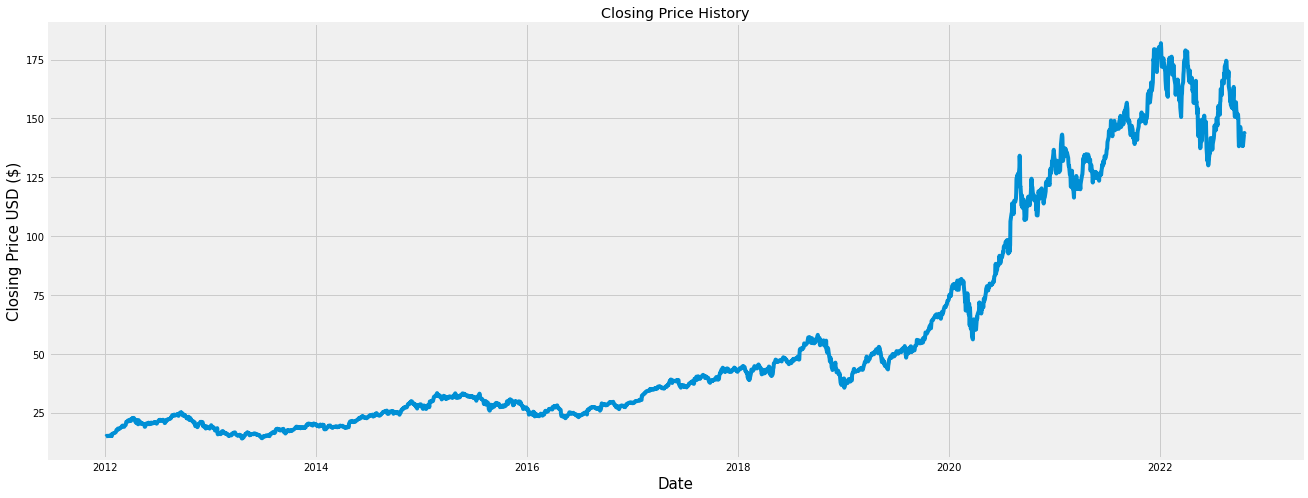

In [29]:
# Visualize closing price history
plt.figure(figsize=(20, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Closing Price USD ($)', fontsize=15);

In [67]:
# Scale the data
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.77234662],
       [0.77300114],
       [0.77020456]])

In [28]:
# create the trainig dataset
train_data = scaled_data[:training_data_length, :]

# Split the data into X, Y
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [33]:
training_data_length

2176

In [37]:
x_train, y_train = np.array(X_train), np.array(y_train)
x_train.shape

(2116, 60)

In [38]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2116, 60, 1)

In [46]:
# Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-10-22 18:41:00.820027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-10-22 18:41:01.064030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-10-22 18:41:01.134576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-10-22 18:41:01.220579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


   3/2116 [..............................] - ETA: 57s - loss: 0.0146  

2022-10-22 18:41:01.350664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2116/2116 [==============================] - 54s 25ms/step - loss: 3.8021e-04


In [49]:
# Create the testing datasets
test_data = scaled_data[training_data_length - 60:, :]

x_test = []
y_test = dataset[training_data_length:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [53]:
# Convert data to numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(543, 60, 1)

In [54]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

2022-10-22 18:49:18.949178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-10-22 18:49:19.051499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-10-22 18:49:19.883115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [55]:
# RMSE for model accuracy
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.613197851900962

In [56]:
# plot the data
train = data[0:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
valid

,Close,Predictions
Date,,
2020-08-26,126.522499,120.515648
2020-08-27,125.010002,122.146645
2020-08-28,124.807503,123.377045
2020-08-31,129.039993,124.258835
2020-09-01,134.179993,125.384415
...,...,...
2022-10-14,138.380005,142.307220
2022-10-17,142.410004,141.752335
2022-10-18,143.750000,141.692566


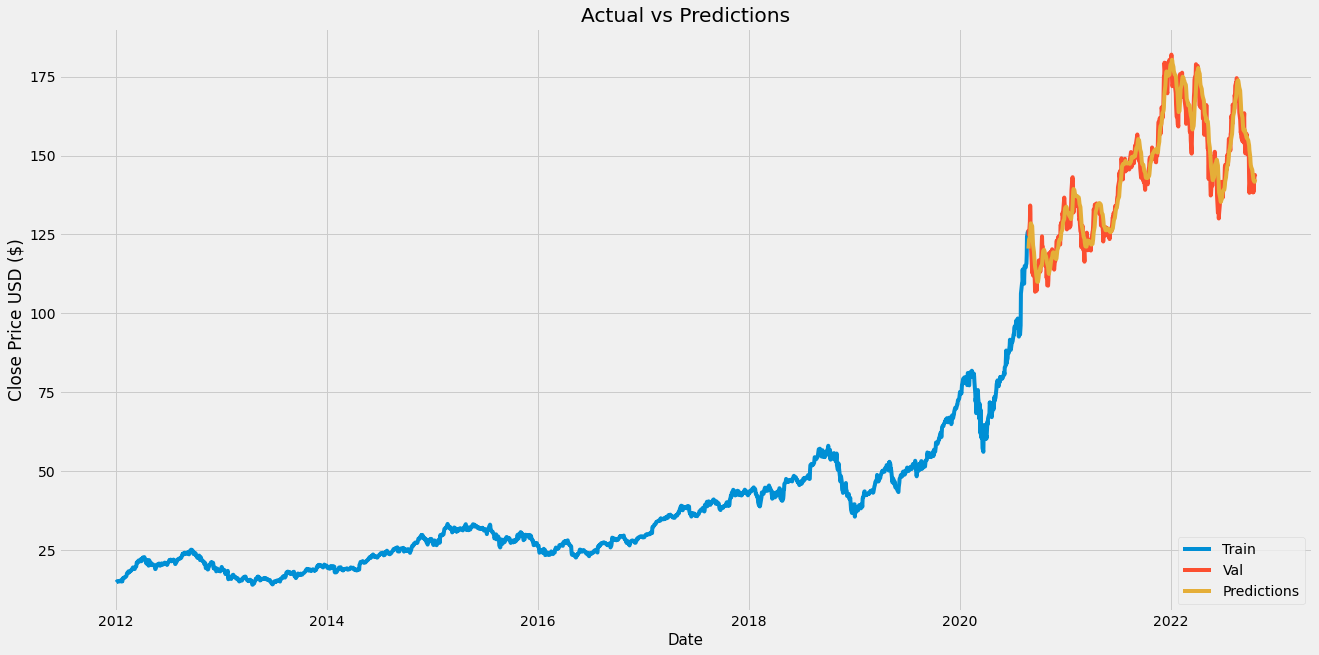

In [74]:
plt.figure(figsize=(20, 10))
plt.title('Actual vs Predictions')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show();

In [80]:
data_last = data.tail(60)
data_last = np.array(data_last)
scaled_data_last = scalar.fit_transform(data_last)
scaled_data_last = np.reshape(scaled_data_last, (60, 1, 1))

# predictions = model.predict(scaled_data_last)
# predictions = scalar.inverse_transform(predictions)
# predictions

scaled_data_last.shape

(60, 1, 1)